In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ttl_path =r'events/Neuropix-PXI-107.ProbeA/TTL'

#os.chdir(ttl_path)t

In [4]:
#exploring data structure
timestamps = np.load('timestamps.npy')
channel_states = np.load("states.npy")

# If channel_states is an integer (bit mask), split into individual channels
num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

# Create DataFrame with timestamps and channel states
all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
print(all_events_df.sum()) #-count instances of each ch
all_events_df.insert(0, 'timestam', timestamps)
    
print(all_events_df)

channel_0    12353
dtype: int64
       timestam  channel_0
0       -1.0000          1
1       -1.0000          1
2       -1.0000          1
3       -7.3935          1
4       -7.3435          1
...         ...        ...
12348  609.8541          1
12349  609.9041          1
12350  609.9541          1
12351  610.0041          1
12352  610.0541          1

[12353 rows x 2 columns]


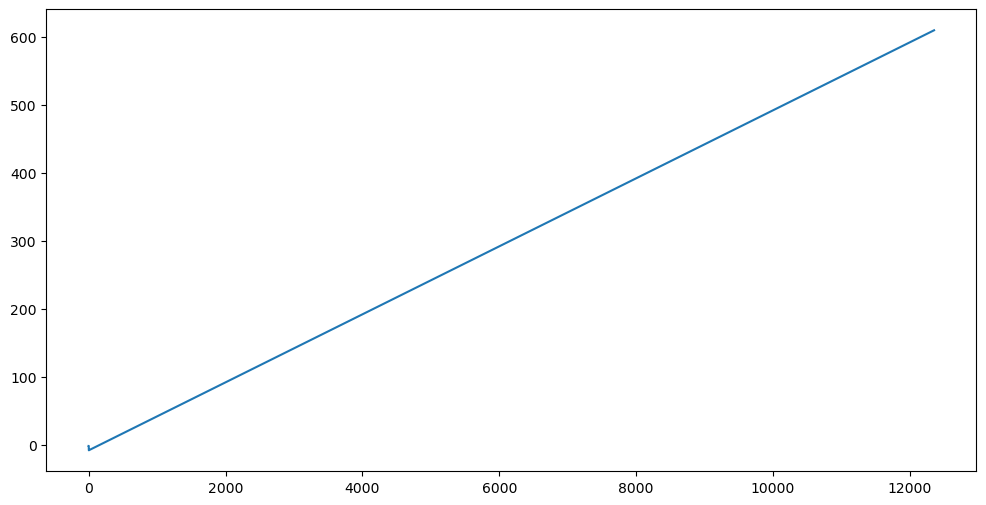

In [7]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(timestamps)

In [5]:
def extract_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    
    
    # Extract TTL events where the state changes
    events_df = pd.DataFrame({
        'timestamp': timestamps,
        'state': channel_states
    })
    
    # Only consider state changes (e.g., rising edge for stimulus onset)
    ttl_onsets = events_df[events_df['state'] == 1].reset_index(drop=True)
    
    return ttl_onsets

In [21]:
def extract_ttl_events_all_channels(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    print(set(channel_states)) #the unique values of channels

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    all_events_df.insert(0, 'timestam', timestamps)

    filtercondition=0
    if filtercondition:
        'hi'
        filtered_df = all_events_df[all_events_df["channel 1"] == 1]

        print("\nFiltered DataFrame (where channel 1 is 1):")
        print(filtered_df)
    else:
       
        return all_events_df
    

In [25]:
import matplotlib.pyplot as plt
timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
timestamps = np.load(timestamps_file_path)
plt.plot(timestamps[0:15000])

FileNotFoundError: [Errno 2] No such file or directory: 'events/Neuropix-PXI-107.ProbeA/TTL/timestamps.npy'

In [26]:
extract_ttl_events_all_channels(ttl_path)

FileNotFoundError: [Errno 2] No such file or directory: 'events/Neuropix-PXI-107.ProbeA/TTL/timestamps.npy'

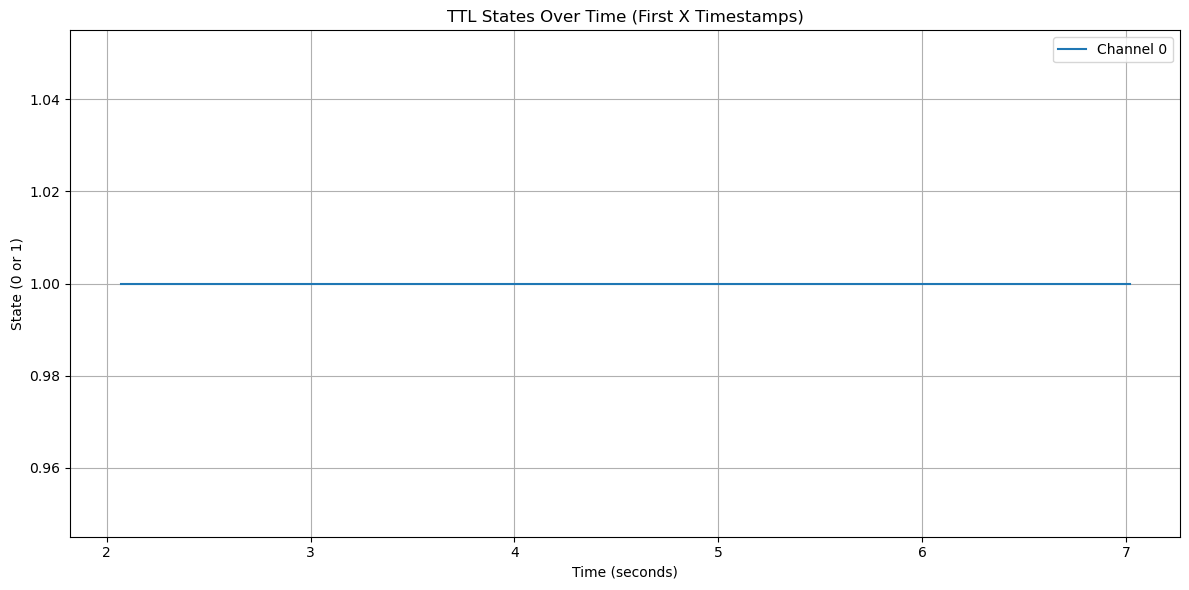

,timestamp,channel_0
0,2.068233,1
1,2.118233,1
2,2.168233,1
3,2.218233,1
4,2.268233,1
...,...,...
95,6.818233,1
96,6.868233,1
97,6.918233,1
98,6.968233,1


In [19]:
def extract_and_plot_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    all_events_df.insert(0, 'timestamp', timestamps)

    # Limit to the first 20 timestamps
    X=100
    limited_events_df = all_events_df.iloc[:X]

    # Plot each channel's state over time
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    for i in range(num_channels):
        plt.plot(
            limited_events_df['timestamp'], 
            limited_events_df[f'channel_{i}'], 
            label=f'Channel {i}'
        )
    
    # Customize plot
    plt.xlabel("Time (seconds)")
    plt.ylabel("State (0 or 1)")
    plt.title("TTL States Over Time (First X Timestamps)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return limited_events_df

extract_and_plot_ttl_events(ttl_path)

[ 1 -1  1 ... -1  1 -1]


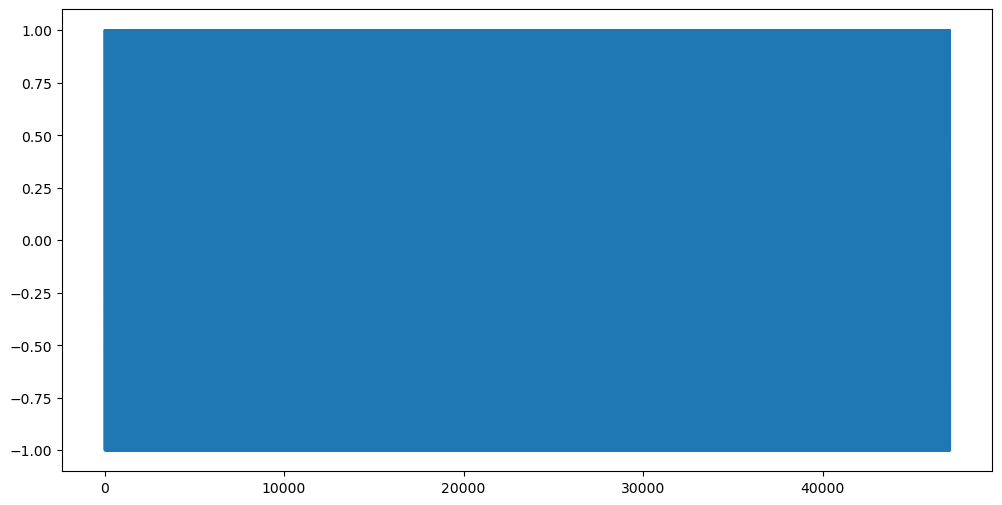

In [23]:
timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
channel_states_file_path = os.path.join(ttl_path, "states.npy")

timestamps = np.load(timestamps_file_path)
channel_states = np.load(channel_states_file_path)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(channel_states)
print(channel_states)

In [8]:
pwd


'C:\\Users\\sherman\\Desktop\\BC matlab'